# Import Standard Tools Pandas, Scikit, Numpy, Scipy, Matplotlib

In [48]:
#NOTES
#Data Analysis PANDAS
#Machine Learning SCIKIT LEARN
#VIZUALIZATION Matplotlib, Seaborn, Pandas
#Math, Linear Algebra, Matrix - Numpy and Scipy


import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))

# Set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
plt.style.use('ggplot')
%matplotlib inline


In [49]:
import nltk
#Python Natural Language Processing ToolKit
nltk.data.path.append("/usr/share/nltk_data-3")


#Other NLP Libraries OPENNLP from Stanford Univ, Apache Tika 

# Feature Extraction from Text: Bag of Words

In [50]:
# A collection of text documents is called a corpus. 
#A text document can be a short string, tweet or a large document. 


#List of 2 String Documents 
#The task is to respresent the documents as a Vector (List or Array) of Numericals
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game'
]

In [51]:
#CountVectorizer is a class for feature extraction from text data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

#todense converts it into a Numpy dense matrix 
print (vectorizer.fit_transform(corpus).todense())
print (vectorizer.vocabulary_)

'''
1. Given a corpus, generate the vocabulary of words that are in the corpus
2. Given a document, create a vector of 0 and 1 depending on whether a vocabulary
word is present or in the document
3. Thus, the feature vector size is the same as the size of the Vocabulary

Issues:
4. Vocabulary size can be large (100s of thousands or more)
5. Some ways to reduce the vocabulary sizes are :

  a. Some Prefiltering (throw some words) Stopwords, Stemming, Lemmazition
  b. Choosing only top-k important words (features) Feature Selection
  c. Dimensionality Reduction using Matrix Factorization 
     (SVD is very common in Text Mining)

'''

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{'basketball': 0, 'played': 5, 'lost': 4, 'in': 3, 'the': 6, 'unc': 7, 'duke': 1, 'game': 2}


'\n1. Given a corpus, generate the vocabulary of words that are in the corpus\n2. Given a document, create a vector of 0 and 1 depending on whether a vocabulary\nword is present or in the document\n3. Thus, the feature vector size is the same as the size of the Vocabulary\n\nIssues:\n4. Vocabulary size can be large (100s of thousands or more)\n5. Some ways to reduce the vocabulary sizes are :\n\n  a. Some Prefiltering (throw some words) Stopwords, Stemming, Lemmazition\n  b. Choosing only top-k important words (features) Feature Selection\n  c. Dimensionality Reduction using Matrix Factorization \n     (SVD is very common in Text Mining)\n\n'

In [52]:
#Another example by adding a third statement different from the first two in the
#words that it contains 

corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]

print (vectorizer.fit_transform(corpus).todense())
print (vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{'basketball': 1, 'played': 6, 'lost': 5, 'in': 4, 'the': 8, 'sandwich': 7, 'unc': 9, 'duke': 2, 'ate': 0, 'game': 3}
10


# Distance between Text Documents, Measurement of Similarity

In [53]:
'''
Once u have a feature vector, there are many ways in which u can
compute how similar/dissimilar they are. Another way is to view
is to compute distance between feature vectors. Larger the distance,
the less similar two vectors are. 

Example of such measures are:
Euclidean Distance
Manhattan Distance
Cosine Similarity for Feature Vectors 
Jaccard Similarity for Sets of Data

Similarity between two document feature vectors can tell you
how similar they are . This can be used for document clustering
or classification.

'''


from sklearn.metrics.pairwise import euclidean_distances

array_ = vectorizer.fit_transform(corpus).todense()
print(array_)

print ('Distance between 1st and 2nd documents:'
       , euclidean_distances(array_[0], array_[1]))

print ('Distance between 1st and 3rd documents:'
       , euclidean_distances(array_[0], array_[2]))

print ('Distance between 2nd and 3rd documents:'
       , euclidean_distances(array_[1], array_[2]))

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
Distance between 1st and 2nd documents: [[ 2.44948974]]
Distance between 1st and 3rd documents: [[ 2.64575131]]
Distance between 2nd and 3rd documents: [[ 2.64575131]]


In [54]:
from sklearn.metrics.pairwise import cosine_similarity

print ('CosSim between 1st and 2nd documents:'
       , cosine_similarity(array_[0], array_[1]))

print ('CosSim between 2nd and 3rd documents:'
       , cosine_similarity(array_[1], array_[2]))

print ('CosSim between 1st and 3rd documents:'
       , cosine_similarity(array_[0], array_[2]))

CosSim between 1st and 2nd documents: [[ 0.4]]
CosSim between 2nd and 3rd documents: [[ 0.]]
CosSim between 1st and 3rd documents: [[ 0.]]


# Text Preprocessing

In [55]:
#STOPWORD FILTERING

'''
Stopwords are words that are common and do not add any value
to document semantics. We can filter these before doing the
feature generation.

Example of such words are: a, at, an, the, in , or, etc.
Many libraries have stopwords in various languages .

As a developer, you can always add somewords to the stopword list
if you think you wanna filter them our. So, stopwords lists can 
be extended. 

'''

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'UNC played Duke in basketball',
'Duke lost the basketball game',
'I ate a sandwich'
]
vectorizer = CountVectorizer(stop_words='english')
print (vectorizer.fit_transform(corpus).todense())
print (vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))

#the and in are filtered  after Stopword filtering stage
#countevectorizer by default throws words like "I" , "a"

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{'basketball': 1, 'played': 5, 'lost': 4, 'sandwich': 6, 'unc': 7, 'duke': 2, 'ate': 0, 'game': 3}
8


In [56]:
#Stemming and lemmatization
'''
After stopword filtering, we can do some more steps. Most common
are Stemming and maybe, Lemmatization. 

Stemming : Input is a word and output is the basic form 
e.g. sandwiches and sandwich both output sandwich. we dont want
many variants of same word in vocabulary. [run, Run, ran, Ran, running] should
all boild down to run.

Example of stemmers :  Porter stemmer, Lancaster Stemmer, Snowball Stemmer 

Knowledge of Regular Expressions and Text Processing Libraries can be Useful.
NLTK is one in Python. OPENNLP, STANFORDNLP, TIKA, etc. There are many text 
processing libraries. Quite a few in Java are available.

Lemmatization usually refers to doing 
things properly with the use of a
vocabulary and morphological analysis 
of words, normally aiming to remove inflectional
endings only and to return the base or 
dictionary form of a word, which is known as the lemma 

Lemmatisation (or lemmatization) in linguistics, 
is the process of grouping together the different 
inflected forms of a word so they can be analysed as a single item.

http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
'''

#without stemming and lemmatization
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
'He ate the sandwiches',
'Every sandwich was eaten by him'
]
vectorizer = CountVectorizer(binary=True, stop_words='english')
print (vectorizer.fit_transform(corpus).todense())
print ( vectorizer.vocabulary_)


[[1 0 0 1]
 [0 1 1 0]]
{'sandwich': 2, 'sandwiches': 3, 'eaten': 1, 'ate': 0}


In [57]:
# Example of stemming 
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()


print(porter_stemmer.stem('sandwiches'))
print(porter_stemmer.stem('sandwich'))
print(porter_stemmer.stem('presumably'))
print(porter_stemmer.stem('owed'))
print(porter_stemmer.stem('abacuses'))

sandwich
sandwich
presum
owe
abacus


In [58]:
from nltk.stem import WordNetLemmatizer


wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('sandwiches'))
print(wordnet_lemmatizer.lemmatize('dogs'))
print(wordnet_lemmatizer.lemmatize('abaci'))

print(wordnet_lemmatizer.lemmatize('is'))
print(wordnet_lemmatizer.lemmatize('is', pos='v'))

print(wordnet_lemmatizer.lemmatize('are', pos='v'))


'''
The NLTK Lemmatization method is based on WordNet’s built-in morphy function.
Here is the introduction from WordNet official website:


WordNet® is a large lexical database of English. Nouns, verbs, 
adjectives and adverbs are grouped into sets of cognitive synonyms
(synsets), each expressing a distinct concept. Synsets are interlinked 
by means of conceptual-semantic and lexical relations. The 
resulting network of meaningfully related words and concepts 
can be navigated with the browser. WordNet is also freely and 
publicly available for download. WordNet’s structure makes it a 
useful tool for computational linguistics and natural language processing.

WordNet superficially resembles a thesaurus, in that it 
groups words together based on their meanings. However, 
there are some important distinctions. First, WordNet interlinks 
not just word forms—strings of letters—but specific senses of
words. As a result, words that are found in close proximity 
to one another in the network are semantically disambiguated.
Second, WordNet labels the semantic relations among words, 
whereas the groupings of words in a thesaurus does not follow
any explicit pattern other than meaning similarity


The goal of both stemming and lemmatization is to reduce inflectional 
forms and sometimes derivationally related forms of a word to a common 
base form.

However, the two words differ in their flavor. Stemming usually 
refers to a crude heuristic process that chops off the ends of 
words in the hope of achieving this goal correctly most of the 
time, and often includes the removal of derivational affixes. 
Lemmatization usually refers to doing things properly with the 
use of a vocabulary and morphological analysis of words, 
normally aiming to remove inflectional endings only and to
return the base or dictionary form of a word, which is known as the lemma .


'''

sandwich
dog
abacus
is
be
be


'\nThe NLTK Lemmatization method is based on WordNet’s built-in morphy function.\nHere is the introduction from WordNet official website:\n\n\nWordNet® is a large lexical database of English. Nouns, verbs, \nadjectives and adverbs are grouped into sets of cognitive synonyms\n(synsets), each expressing a distinct concept. Synsets are interlinked \nby means of conceptual-semantic and lexical relations. The \nresulting network of meaningfully related words and concepts \ncan be navigated with the browser. WordNet is also freely and \npublicly available for download. WordNet’s structure makes it a \nuseful tool for computational linguistics and natural language processing.\n\nWordNet superficially resembles a thesaurus, in that it \ngroups words together based on their meanings. However, \nthere are some important distinctions. First, WordNet interlinks \nnot just word forms—strings of letters—but specific senses of\nwords. As a result, words that are found in close proximity \nto one anot

In [59]:

import string,re

#NLTK IMPORTS 
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag



def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token




stemmer = PorterStemmer()

lemmatizer = WordNetLemmatizer()


print (stemmer.stem('gathering'))

corpus = [
'He ate the sandwiches',
'Every sandwich was eaten by him'
]



#Python List Comprehension

tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print("POS INFO")
print(tagged_corpus)

print("After Stemming")
print ('Stemmed:', [[stemmer.stem(token) for token in 
                    word_tokenize(document)] for document in corpus])

print("After Lemmatization")
print ('Lemmatized:', [[lemmatize(token, tag) for token, tag in
document] for document in tagged_corpus])

#
#Through stemming and lemmatization, we can reduce the dimensionality of our
#feature space.

#Stemming was -> wa   , every -> every (stemming may producsing useless output)
#Lemmatization was -> be , every -> every (lemmatization will procude meaningful words)


gather
POS INFO
[[('He', 'PRP'), ('ate', 'VBP'), ('the', 'DT'), ('sandwiches', 'NNS')], [('Every', 'DT'), ('sandwich', 'NN'), ('was', 'VBD'), ('eaten', 'VBN'), ('by', 'IN'), ('him', 'PRP')]]
After Stemming
Stemmed: [['He', 'ate', 'the', 'sandwich'], ['Everi', 'sandwich', 'wa', 'eaten', 'by', 'him']]
After Lemmatization
Lemmatized: [['He', 'eat', 'the', 'sandwich'], ['Every', 'sandwich', 'be', 'eat', 'by', 'him']]


In [60]:
#Motivate TF IDF Term Freq , Inverse Doc Frequency

from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich and I ate a sandwich', 'the wizard transfigured a sandwich ']
vectorizer = CountVectorizer(stop_words='english')
print (vectorizer.fit_transform(corpus).todense())


[[2 1 2 0 0]
 [0 0 1 1 1]]


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['The dog ate a sandwich and I ate a sandwich',
          'The wizard transfigured a sandwich']

print("CountVectorizer Feat Vectors")
vectorizer = CountVectorizer(stop_words='english')
print (vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)


print("TFIDF Feat Vectors")
vectorizer = TfidfVectorizer(stop_words='english')
print (vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

#
#By comparing the TF-IDF weights to the raw term frequencies, we can see that words
#that are common to many of the documents in the corpus, such as sandwich, have
#been penalized.
#

CountVectorizer Feat Vectors
[[2 1 2 0 0]
 [0 0 1 1 1]]
{'sandwich': 2, 'transfigured': 3, 'ate': 0, 'dog': 1, 'wizard': 4}
TFIDF Feat Vectors
[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]
{'sandwich': 2, 'transfigured': 3, 'ate': 0, 'dog': 1, 'wizard': 4}


In [62]:
#N-grams

print("TFIDF Feat Vectors")


vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
print (vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

TFIDF Feat Vectors
[[ 0.55416811  0.55416811  0.27708406  0.27708406  0.39429518  0.27708406
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.33517574  0.
   0.47107781  0.47107781  0.47107781  0.47107781]]
{'transfigured sandwich': 7, 'wizard transfigured': 9, 'sandwich ate': 5, 'ate sandwich': 1, 'sandwich': 4, 'transfigured': 6, 'ate': 0, 'dog ate': 3, 'dog': 2, 'wizard': 8}


# SPAM CLASSIFICATION

In [63]:
#read the spam/non-span data into a list
messages = [line.rstrip() for line in open('./SMSSpamCollection')]
print (len(messages))

5574


In [64]:
#Explore some lines  , Python ENUMERATE 
for message_no, message in enumerate(messages[:10]):
    print (message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [65]:
from IPython.display import Image
Image(filename='./presentations/ml.png')

FileNotFoundError: [Errno 2] No such file or directory: './presentations/ml.png'

# Step 1: Load data, look around EDA

In [101]:
import csv
messages = pd.read_csv('./SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,names=["label", "message"])
print (messages)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
...    ...                                                ...
5564   ham  Ok lor... Sony ericsson salesman... I ask shuh...
5565   ham                                Ard 6 like dat lor.
5566   ham  Why don't you wait 'til at least wednesday to ...
5567   ham                                       Huh y lei...
5568  sp

In [102]:
#Print spam ham stats
messages.groupby('label').describe()

                                                        message
label                                                          
ham   count                                                4827
      unique                                               4518
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [103]:
#add a new column to the dataframe which stroes the lenght of the messages (number of characters)
#can length be a useful feature ???
# u can create new features and add them as new columns to the dataframe 

messages['length'] = messages['message'].map(lambda text: len(text))
print (messages.head())

  label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


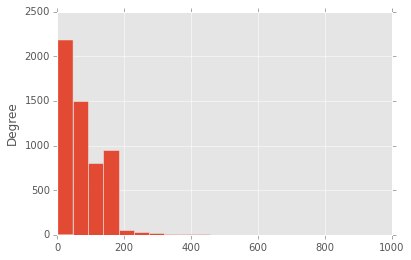

In [104]:
messages.length.plot(bins=20, kind='hist')

In [105]:
#describe function prints a 5 number of summary
messages.length.describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [106]:
#Pandas filtering 

print (list(messages.message[messages.length > 900]))

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe23c1a358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7efe38fd6da0>], dtype=object)

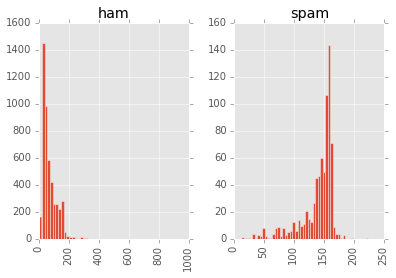

In [107]:
#plot data len distribution by label (ham or spam)
messages.hist(column='length', by='label', bins=50)

# Step 2: Data preprocessing

In [108]:
#take a message, split into list of tokens/words based on whitespace
def split_into_tokens(message):
  
    #message = unicode(message, 'utf8')  # convert bytes into proper unicode
    return message.split()

In [109]:
messages.message.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [110]:
#split message into tokens
messages.message.head().apply(split_into_tokens)

0    [Go, until, jurong, point,, crazy.., Available...
1                 [Ok, lar..., Joking, wif, u, oni...]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor..., U, c, already...
4    [Nah, I, don't, think, he, goes, to, usf,, he,...
Name: message, dtype: object

In [111]:
#columns in the dataset
print(messages.columns)
print(messages.head())

Index(['label', 'message', 'length'], dtype='object')
  label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


In [112]:
#Lets Try  Stemming 

#STEMMING , No Lemmatization

import string

def stem_tokens(tokens,stemmer):
    tokenLower=[token.lower() for token in tokens]
    return [stemmer.stem(token) for token in  tokenLower]

def tokenize(text):
    stemmer=PorterStemmer()
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    tokensNoStop=[]

    stems = stem_tokens(tokens, stemmer)
    return " ".join(stems)


messages['messageStemmed'] = messages['message'].apply(tokenize)


#Data in Raw Form
print(messages['message'].ix[0,:])


#Stemming and Convert to Lower Case 
print(messages['messageStemmed'].ix[0,:])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat


# FIRST MODEL NAIVE BAYES

In [113]:

#Init the Feature Extracter
count_vectorizer = CountVectorizer(stop_words='english')

#Fit countvectorizer
counts = count_vectorizer.fit_transform(messages['messageStemmed'].values)
print(type(counts))
#<class 'scipy.sparse.csr.csr_matrix'>


#convert to dense matrix
countsDense=counts.todense()
print(type(countsDense))

#convert to Pandas DataFrame
X=pd.DataFrame(countsDense)
print(X.shape)


#get the targets to train/predict
#lets represent ham by 1 and spam by 0 
codingDict = {"ham":1,"spam":0}
messages['labelNew']=messages['label'].map(codingDict)
targets = messages['labelNew'].values
print(targets)
print(messages.columns) #create new label 0/1 from spam/ham 'label', 'message', 'length', 'labelNew'

Y=targets


print("Shapes on Feat Mat and Target Matrix is %s %s " % (counts.shape,targets.shape))

#print the first feature vector 
print("The first feature vector is :")
print(counts[0,:])




<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrixlib.defmatrix.matrix'>
(5574, 7970)
[1 1 0 ..., 1 1 1]
Index(['label', 'message', 'length', 'messageStemmed', 'labelNew'], dtype='object')
Shapes on Feat Mat and Target Matrix is (5574, 7970) (5574,) 
The first feature vector is :
  (0, 4036)	1
  (0, 5500)	1
  (0, 2207)	1
  (0, 1323)	1
  (0, 5167)	1
  (0, 1722)	1
  (0, 3352)	1
  (0, 7730)	1
  (0, 4180)	1
  (0, 1720)	1
  (0, 1993)	1
  (0, 3315)	1
  (0, 1138)	1
  (0, 7536)	1


In [114]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X,Y)

#Predict 
pred=classifier.predict(X)

print("Prediction Socre is " , classifier.score(X,Y))

Prediction Socre is  0.993720846789


In [115]:
# You cannot use the whole data for training and then test it on the model which used the test data also
#so lets create Training and Test Data ???

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=4)

print("Data Set Shapes %s %s %s %s" %(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))

#DONT USE TEST DATA IN MODEL BUILDING PROCESS



Data Set Shapes (4459, 7970) (4459,) (1115, 7970) (1115,)


In [116]:
#Build Model 
#fit the training data
classifier = MultinomialNB()
classifier.fit(X_train, Y_train) 

#predict on training data
train_pred = classifier.predict(X_train)

#predict on test data 
test_pred = classifier.predict(X_test)

from sklearn import metrics
print( "Train Accuracy:", metrics.accuracy_score(Y_train, train_pred))
print( "Test Accuracy:", metrics.accuracy_score(Y_test, test_pred))

Train Accuracy: 0.99416909621
Test Accuracy: 0.970403587444


In [117]:
# Confusion Matrix is used to compute TruePos, FalsePos, TrueNeg, FalseNeg
#This can be used to compute metrics like Precision, Recall, F1-Score which
#are used to report classifier performance 

cmTest = metrics.confusion_matrix(Y_test, test_pred)
cmTrain = metrics.confusion_matrix(Y_train, train_pred)

print("Confusion Matrix for Training Data")
print(cmTrain)

print("Confusion Matrix for Test Data")
print(cmTest)

Confusion Matrix for Training Data
[[ 575   15]
 [  11 3858]]
Confusion Matrix for Test Data
[[141  16]
 [ 17 941]]


In [118]:
from sklearn import metrics

#of the items we predicted to belong to a class C, how many did we get right
print ("Precision:", metrics.precision_score(Y_test, test_pred, average='binary'))

#of the items which belong to class C, how many did we get right
print ("Recall:", metrics.recall_score(Y_test, test_pred, average='binary'))

# a single number to represent performance, F1_Score = (2PR/(P+R))
print ("F1 Score:", metrics.f1_score(Y_test, test_pred, average='binary'))

Precision: 0.983281086729
Recall: 0.982254697286
F1 Score: 0.982767624021


# Use TfIDFVectorizer 

In [119]:
tf_vectorizer = TfidfVectorizer(stop_words='english')

#Fit tfidfvectorizer
counts = tf_vectorizer.fit_transform(messages['messageStemmed'].values)
print(type(counts))
#<class 'scipy.sparse.csr.csr_matrix'>


#convert to dense matrix
countsDense=counts.todense()
print(type(countsDense))

#convert to Pandas DataFrame
X=pd.DataFrame(countsDense)
print(X.shape)


#get the targets to train/predict
#lets represent ham by 1 and spam by 0 
codingDict = {"ham":1,"spam":0}
messages['labelNew']=messages['label'].map(codingDict)
targets = messages['labelNew'].values
print(targets)
print(messages.columns) #create new label 0/1 from spam/ham 'label', 'message', 'length', 'labelNew'

Y=targets


print("Shapes on Feat Mat and Target Matrix is %s %s " % (counts.shape,targets.shape))

#print the first feature vector 
print("The first feature vector is :")
print(counts[0,:])

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.matrixlib.defmatrix.matrix'>
(5574, 7970)
[1 1 0 ..., 1 1 1]
Index(['label', 'message', 'length', 'messageStemmed', 'labelNew'], dtype='object')
Shapes on Feat Mat and Target Matrix is (5574, 7970) (5574,) 
The first feature vector is :
  (0, 7536)	0.193710510317
  (0, 1138)	0.348686924906
  (0, 3315)	0.161811923942
  (0, 1993)	0.294574296835
  (0, 1720)	0.332859995787
  (0, 4180)	0.294574296835
  (0, 7730)	0.236963746858
  (0, 3352)	0.194080503704
  (0, 1722)	0.294574296835
  (0, 5167)	0.168155689475
  (0, 1323)	0.2651515607
  (0, 2207)	0.270037180084
  (0, 5500)	0.238095246665
  (0, 4036)	0.348686924906


In [120]:
#Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X,Y)

#Predict 
pred=classifier.predict(X)

print("Prediction Socre is " , classifier.score(X,Y))

# You cannot use the whole data for training and then test it on the model which used the test data also
#so lets create Training and Test Data ???

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=4)

print("Data Set Shapes %s %s %s %s" %(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape))

#DONT USE TEST DATA IN MODEL BUILDING PROCESS

#Build Model 
#fit the training data
classifier = MultinomialNB()
classifier.fit(X_train, Y_train) 

#predict on training data
train_pred = classifier.predict(X_train)

#predict on test data 
test_pred = classifier.predict(X_test)

from sklearn import metrics
print( "Train Accuracy:", metrics.accuracy_score(Y_train, train_pred))
print( "Test Accuracy:", metrics.accuracy_score(Y_test, test_pred))



Prediction Socre is  0.979906709724
Data Set Shapes (4459, 7970) (4459,) (1115, 7970) (1115,)
Train Accuracy: 0.976003588248
Test Accuracy: 0.959641255605


In [121]:
#Build Model 
#fit the training data
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train, Y_train) 

#predict on training data
train_pred = classifier.predict(X_train)

#predict on test data 
test_pred = classifier.predict(X_test)

from sklearn import metrics
print( "Train Accuracy:", metrics.accuracy_score(Y_train, train_pred))
print( "Test Accuracy:", metrics.accuracy_score(Y_test, test_pred))


Train Accuracy: 0.967032967033
Test Accuracy: 0.943497757848


# CountVectorizer worked better in our case for Spam Classification compared to TfIDF Vectorizer